In [513]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import plotly.express as px

### Exploration du Dataset

In [514]:
df = pd.read_csv("dataset.csv", encoding='utf-8')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [515]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [516]:
# representation du dataset
df.shape

(1338, 7)

In [517]:
# vérification des doublons
print(df.duplicated().value_counts()) #ajouter param subset dans duplicated

False    1337
True        1
dtype: int64


In [518]:
df.loc[df.duplicated(keep= False),:]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [519]:
# suppression des doublons
df.drop_duplicates(keep = 'first', inplace=True)
print(df.duplicated().value_counts()) 

False    1337
dtype: int64


In [520]:
# vérification des données nulles
print(df.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<AxesSubplot:>

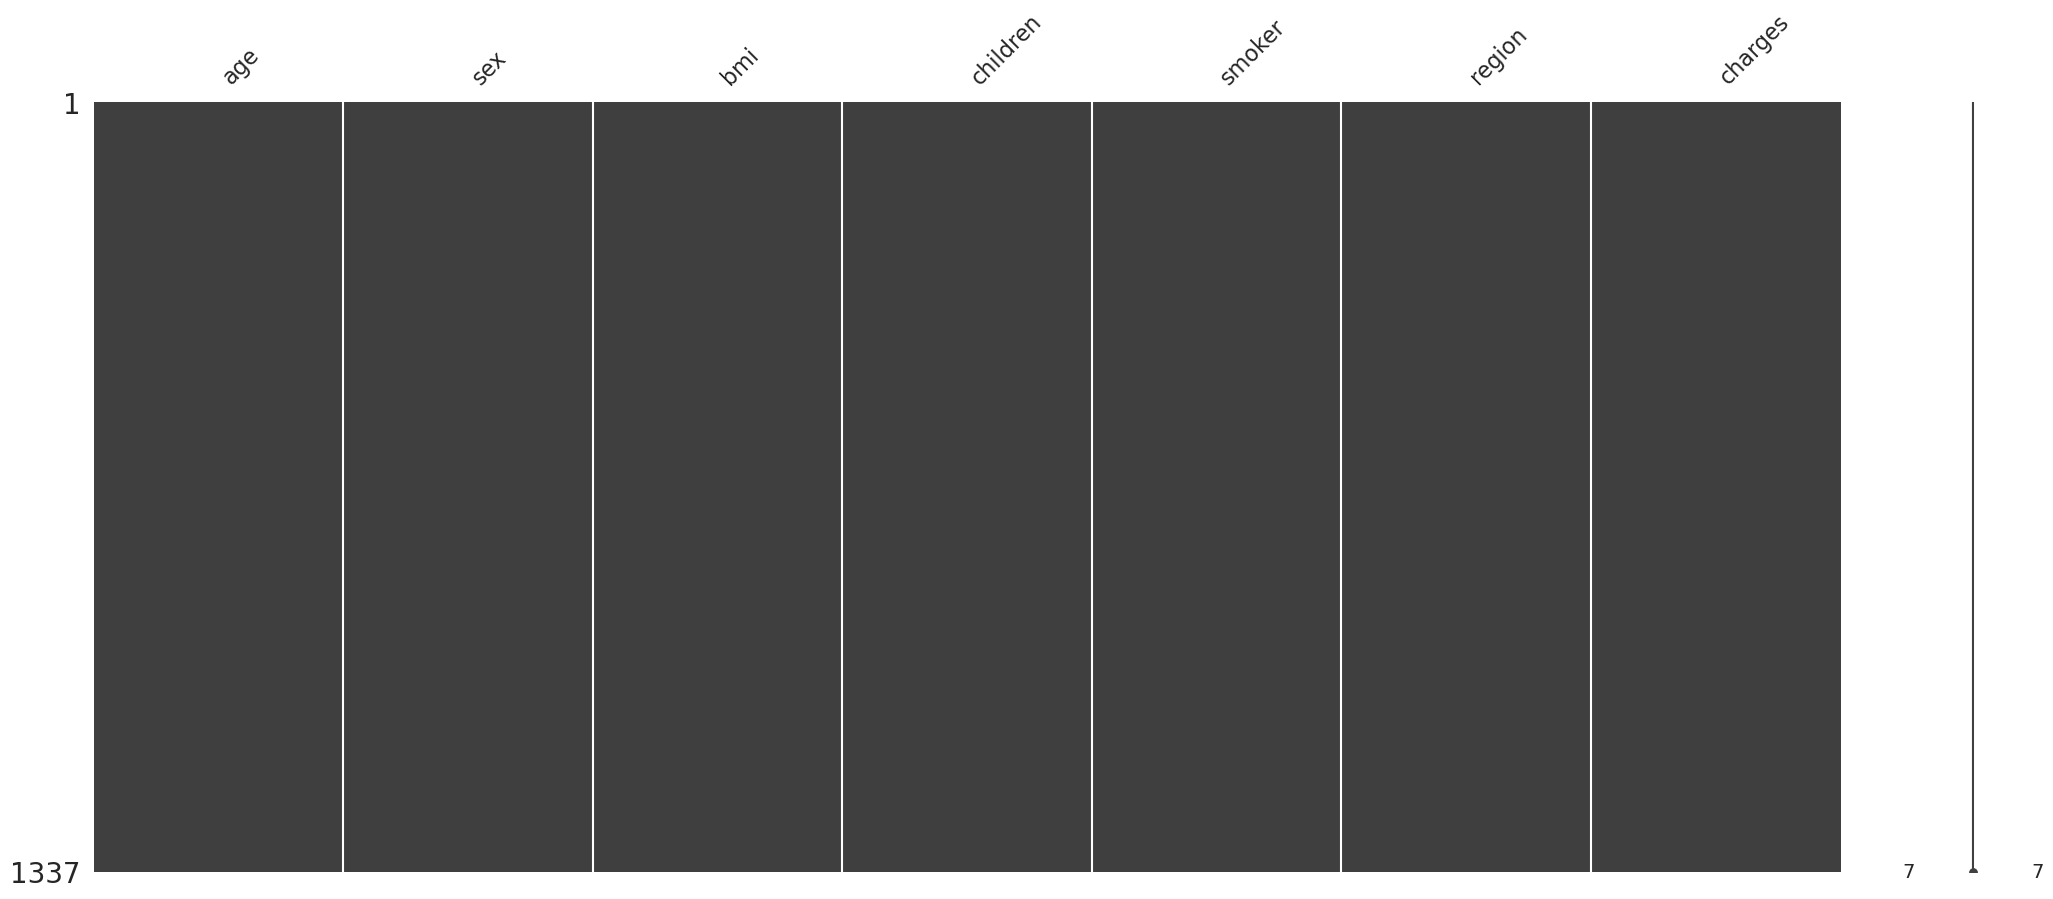

In [521]:
msno.matrix(df)

In [522]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:>

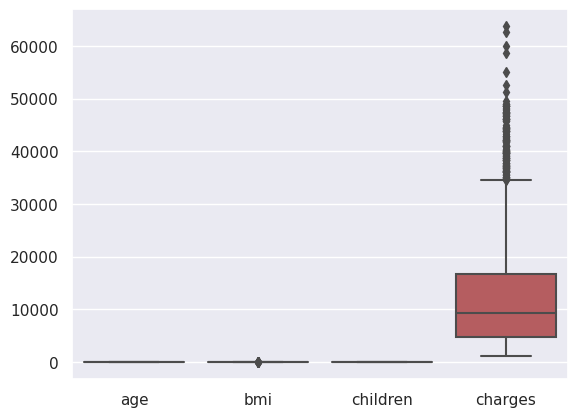

In [523]:
sns.boxplot(df)

<AxesSubplot:>

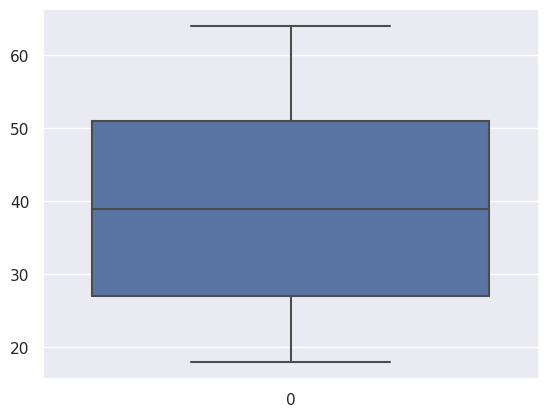

In [524]:
sns.boxplot(df['age'])



<AxesSubplot:>

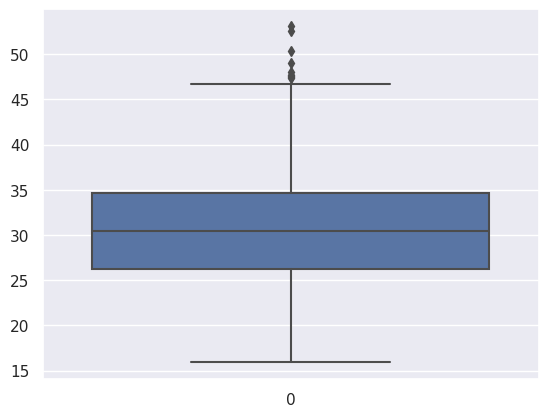

In [525]:
sns.boxplot(df['bmi'])

<AxesSubplot:>

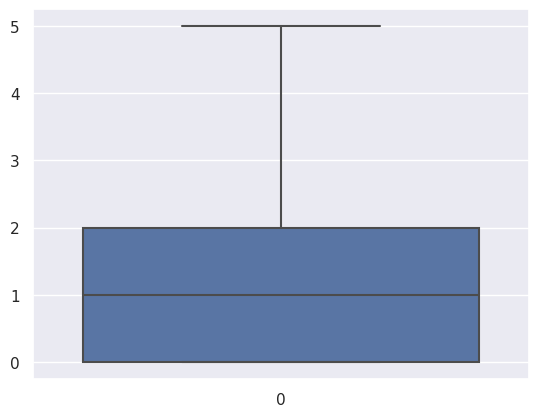

In [526]:
sns.boxplot(df['children'])

<AxesSubplot:xlabel='charges', ylabel='Count'>

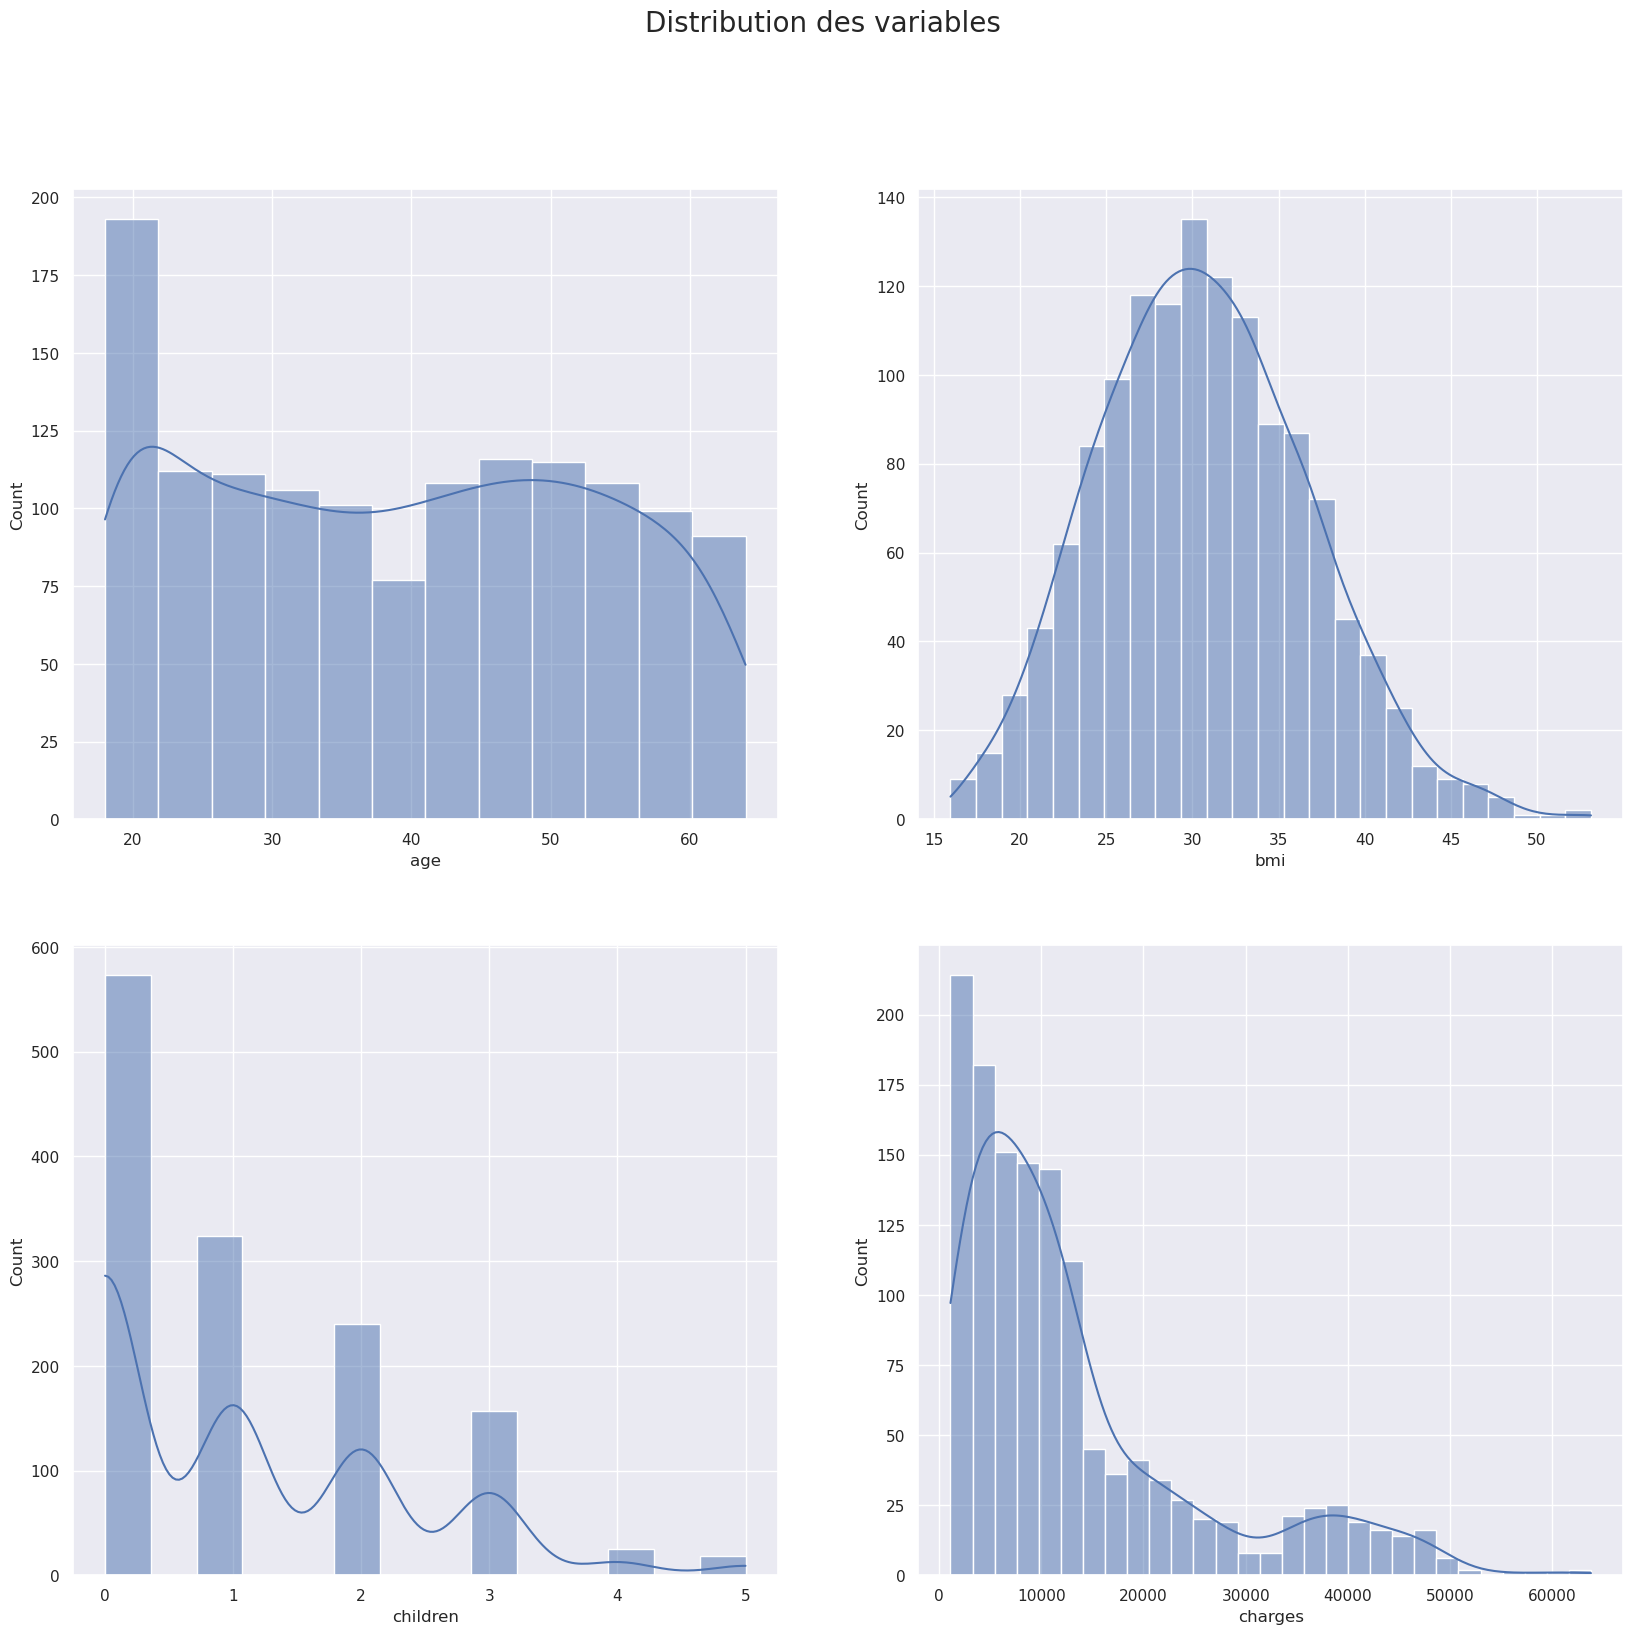

In [527]:
fig, ax = plt.subplots(2,2, figsize = (20,18))
plt.suptitle("Distribution des variables", fontsize = 20)
sns.histplot(ax=ax[0,0], x="age", data=df, kde = True)
sns.histplot(ax=ax[0,1], x="bmi", data=df, kde = True)
sns.histplot(ax=ax[1,0], x="children", data=df, kde = True)
sns.histplot(ax=ax[1,1], x="charges", data=df, kde = True)

<AxesSubplot:xlabel='charges', ylabel='Count'>

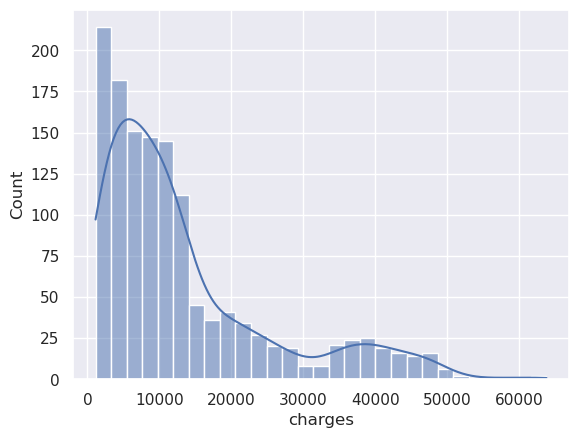

In [528]:
sns.histplot(df["charges"], kde = True)

/tmp/ipykernel_10658/4025128659.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/tmp/ipykernel_10658/4025128659.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot:>

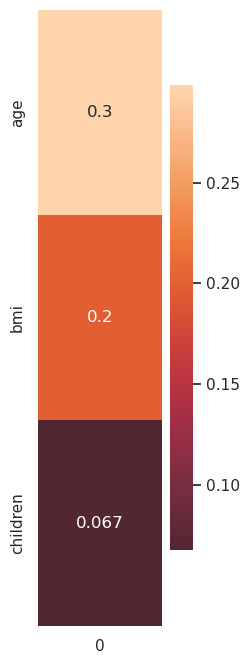

In [529]:
corr = df.corr()
corr_to_charges = df.drop('charges', axis=1).corrwith(df['charges'])
fig, ax = plt.subplots()
fig.set_size_inches(2,8)

sns.heatmap(pd.DataFrame(corr_to_charges), center=0, ax=ax, annot=True)

<AxesSubplot:>

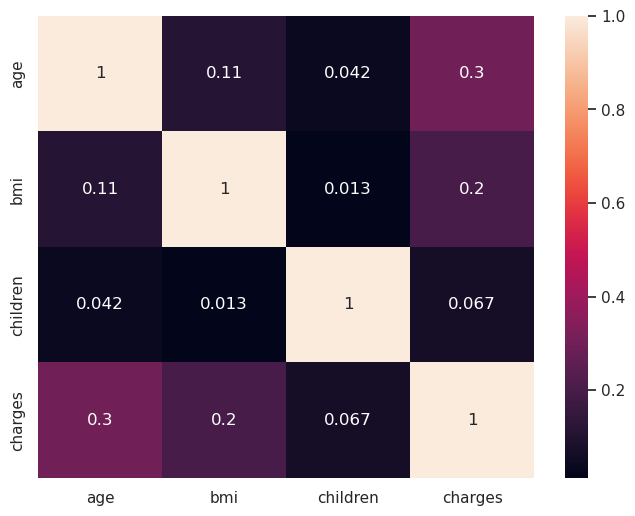

In [530]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot = True)

In [531]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


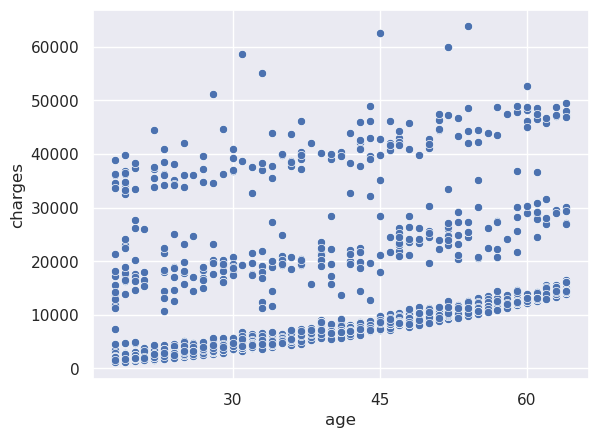

In [532]:
sns.set()

ax = sns.scatterplot(x="age", y="charges", data=df)
ax.set(xlabel='age', ylabel='charges')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

In [533]:
plot = px.histogram(df, x='sex', color='smoker')
plot.show()

<AxesSubplot:xlabel='sex', ylabel='charges'>

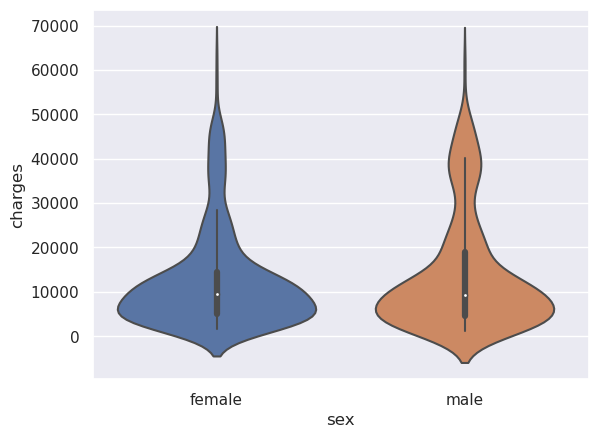

In [534]:
sns.violinplot(x='sex', y='charges', data=df)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

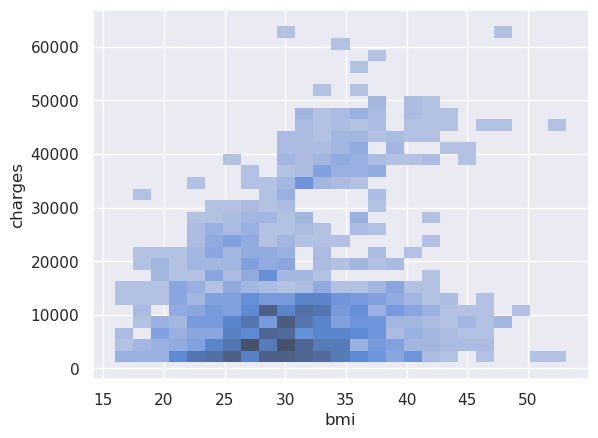

In [535]:
sns.histplot(x = 'bmi', y='charges', data=df)

In [536]:
pie = df['region'].value_counts()
a = pie.index
b = pie.values
fig = px.pie(df, values=b, names=a)
fig.show()

<AxesSubplot:xlabel='region', ylabel='charges'>

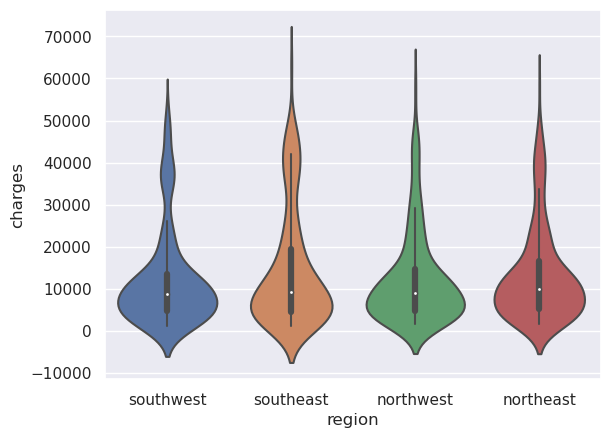

In [537]:
sns.violinplot(x='region', y='charges', data=df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

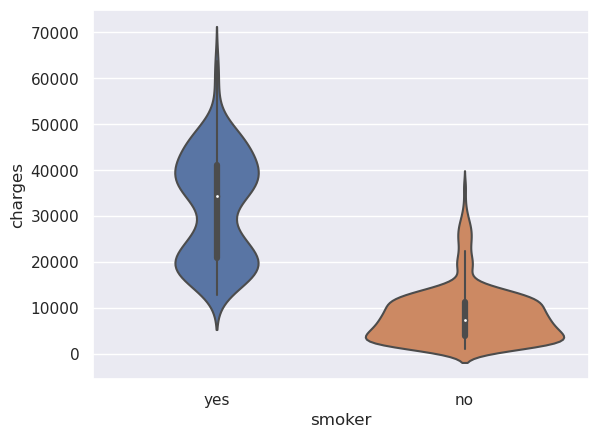

In [538]:
sns.violinplot(x='smoker', y='charges', data=df)

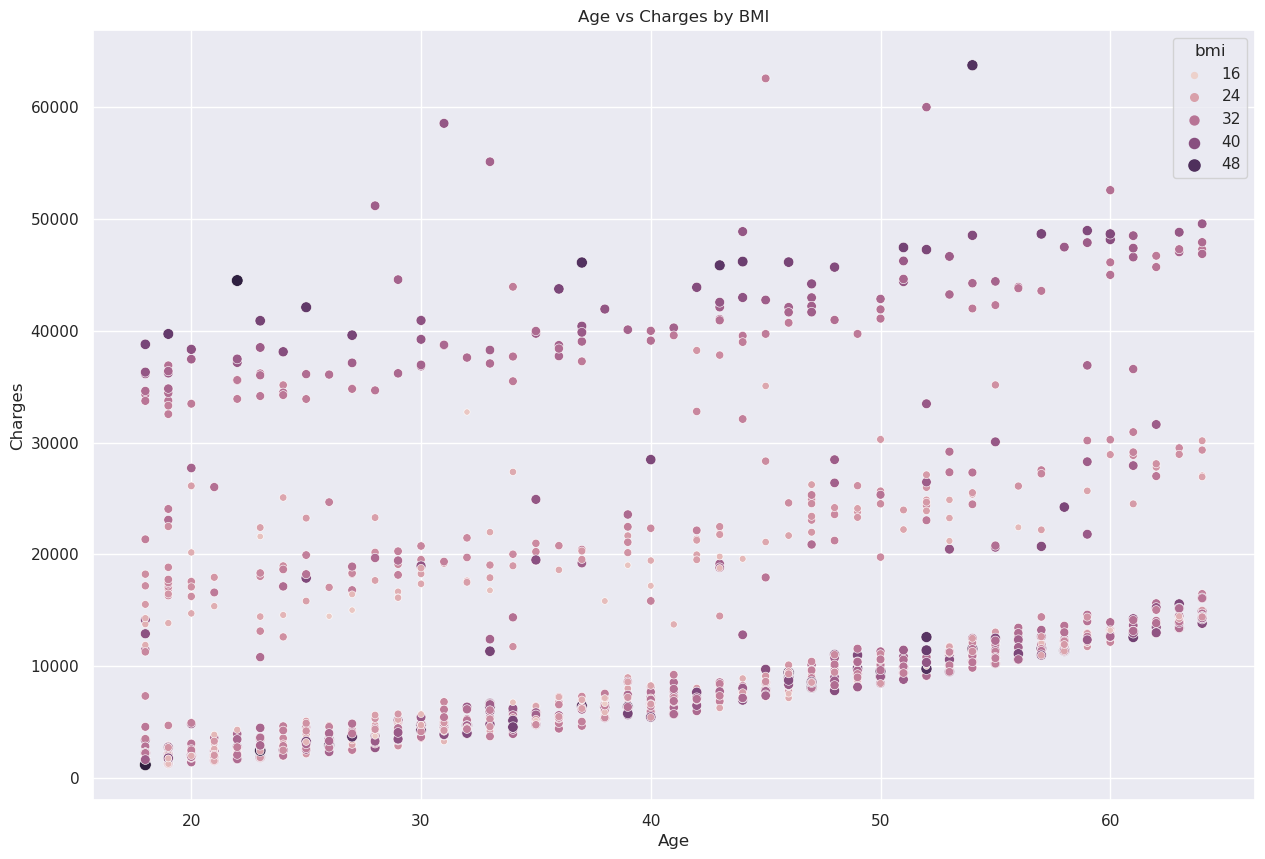

In [539]:
# Relation entre l'age, le bmi et les charges
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x='age',y='charges',hue = 'bmi',size = 'bmi', data=df)
ax = ax.set_title("Age vs Charges by BMI")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show(ax)

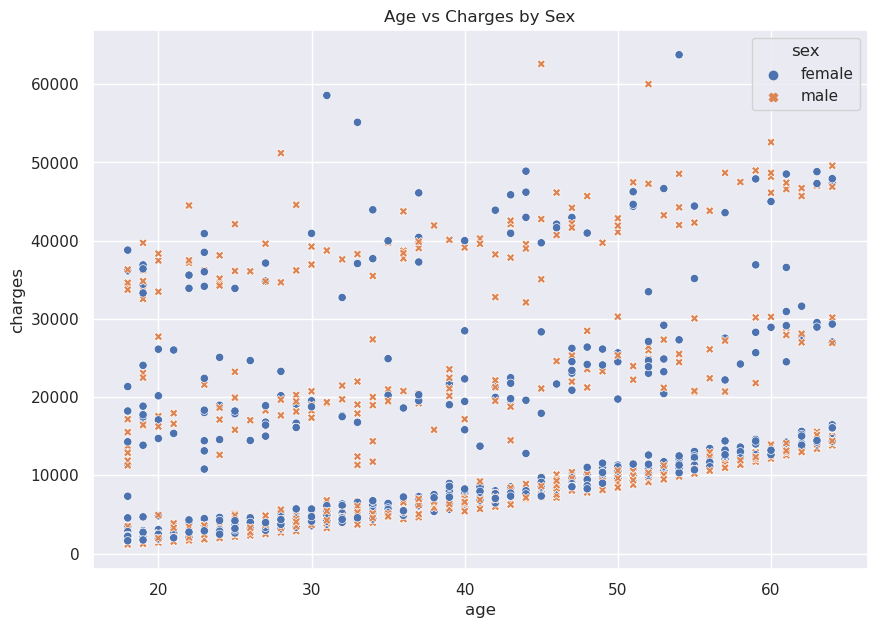

In [540]:
# Relation entre l'age, les charges et le sexe
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x='age',y='charges', hue='sex',style = 'sex',data=df)
ax.set_title("Age vs Charges by Sex")
plt.show(ax)

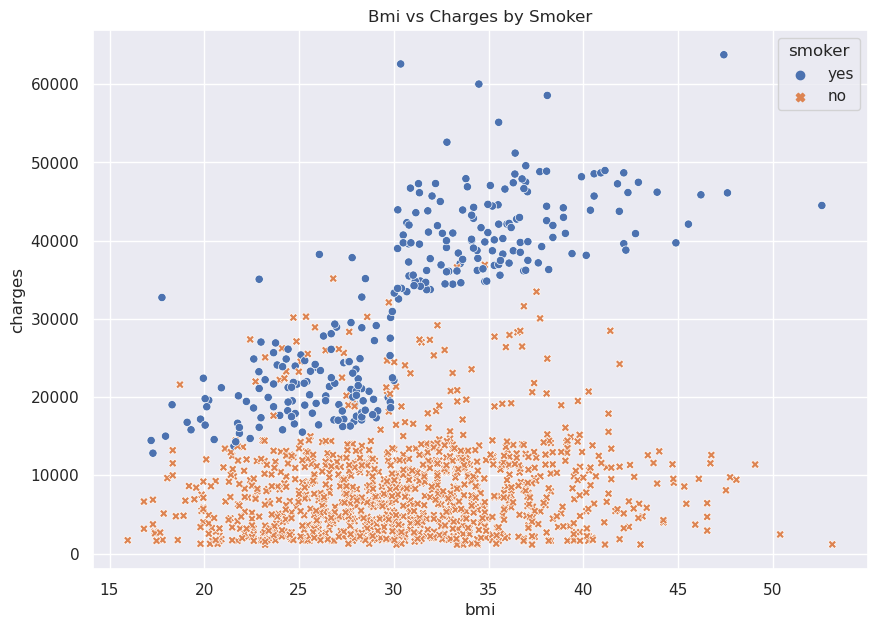

In [543]:
# Relation entre l'imc, les charges et le statut fumeur
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x='bmi',y='charges', hue='smoker',style = 'smoker',data=df)
ax.set_title("Bmi vs Charges by Smoker")
plt.show(ax)

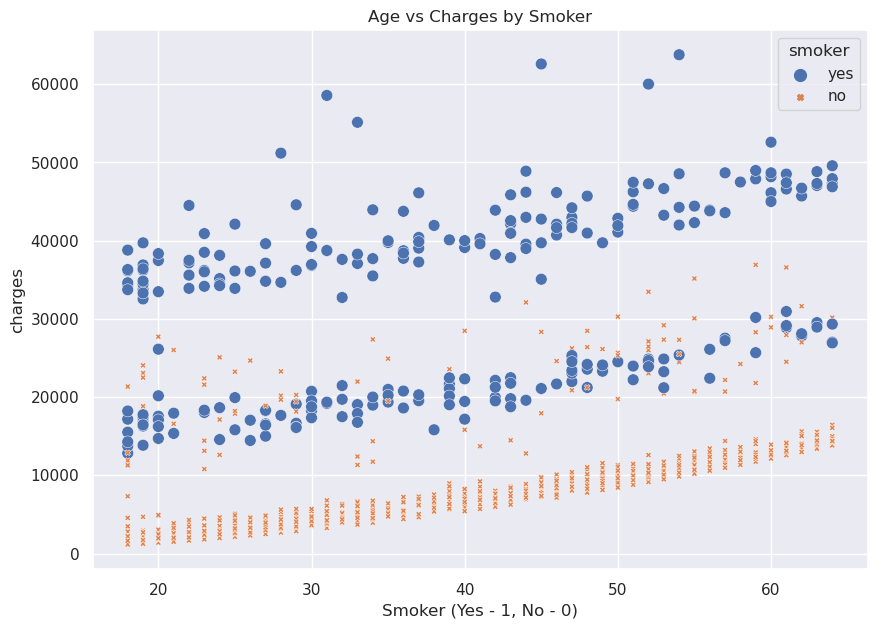

In [541]:
# Relation entre l'age, les charges et le statut de fumeur
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x='age',y='charges', hue=df['smoker'],style = df['smoker'],size = df['smoker'], data=df)
ax.set_title("Age vs Charges by Smoker")
plt.xlabel("Smoker (Yes - 1, No - 0)")
plt.ylabel("charges")
plt.show(ax)

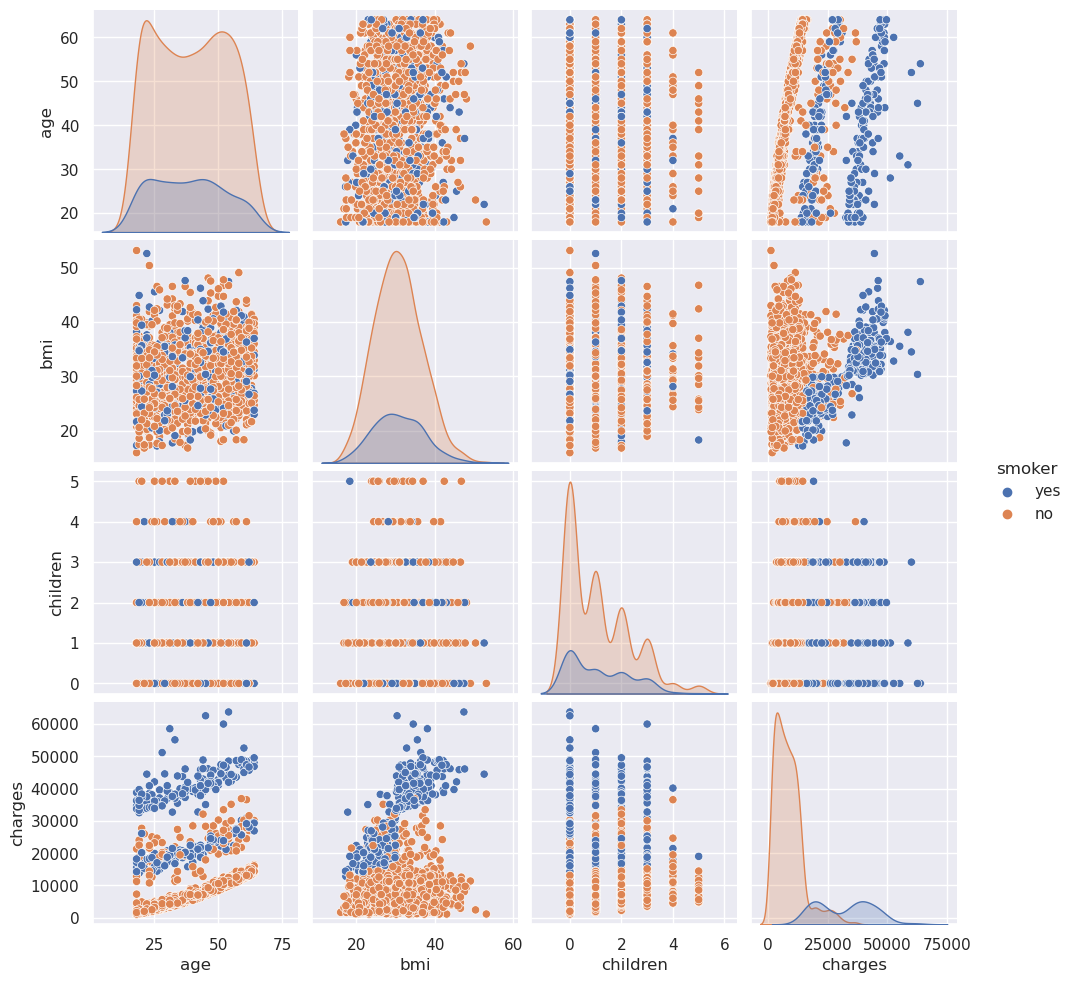

In [544]:
sns.pairplot(df, hue= 'smoker')
plt.show()

In [542]:
# Export du Dataframe dans un nouveau fichier .csv
df.to_csv('dataset_clean.csv', index=False)